KOTS Gabriel - initial data prep
* read in pickle
* split into chapters
* run several functions to chunk the text
* all in dataframes this time compared to lists in tex_prep_v02
* need to consider merging/fixing words that are split over a new line

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import textacy
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
import pickle

In [13]:
book_dict = {'The Elephant Vanishes': 'ev_birnbaum_rubin_v01', 
             'Norwegian Wood 1': 'nw_birnbaum_v01', 
             'Norwegian Wood 2': 'nw_rubin_v01',
             'Wild Sheep Chase': 'wsc_birnbaum_v01', 
             'Wind Up Bird Chronicle': 'wubc_all_rubin_v01', 
             'Sputnik Sweetheart': 'ss_gabriel_v01',
             'Kafka on the Shore': 'kots_gabriel_v01'}

In [14]:
books = pd.DataFrame.from_dict(book_dict, orient='index').reset_index()
books.columns = ['Title', 'Pickle']
books

,Title,Pickle
0,The Elephant Vanishes,ev_birnbaum_rubin_v01
1,Norwegian Wood 1,nw_birnbaum_v01
2,Norwegian Wood 2,nw_rubin_v01
3,Wild Sheep Chase,wsc_birnbaum_v01
4,Wind Up Bird Chronicle,wubc_all_rubin_v01
5,Sputnik Sweetheart,ss_gabriel_v01
6,Kafka on the Shore,kots_gabriel_v01


In [15]:
def load_pickle(filename):
    in_path = '../../../../Documents/murakami/pkl/' + filename + '.pkl'
    with open (in_path, 'rb') as fp:
        return pickle.load(fp)

In [16]:
books['full_text'] = books['Pickle'].apply(load_pickle)

In [17]:
books

,Title,Pickle,full_text
0,The Elephant Vanishes,ev_birnbaum_rubin_v01,I’M IN THE kitchen cooking spaghetti when the ...
1,Norwegian Wood 1,nw_birnbaum_v01,C H II P T E R 6 (rontinutd) The scene at dinn...
2,Norwegian Wood 2,nw_rubin_v01,[Haruki Murakami Norwegian Wood This book was ...
3,Wild Sheep Chase,wsc_birnbaum_v01,"[\n , \n \n \n , Contents \n Cover \n About th..."
4,Wind Up Bird Chronicle,wubc_all_rubin_v01,[1 \n Tuesday’s Wind-up Bird \n ♦ \n Six Finge...
5,Sputnik Sweetheart,ss_gabriel_v01,[Haruki Murakami None This book was produced i...
6,Kafka on the Shore,kots_gabriel_v01,[Kafka on the Shore \n Haruki Murakami \n \n \...


In [73]:
# books.iloc[0,2]

In [21]:
kots_g = books['full_text'].iloc[6]

In [22]:
# wsc is read from an epub and is a list of texts
len(kots_g)

53

In [41]:
kots_g[2]

"\r\n    This Is a Borzoi Book Published by Alfred A. Knopf\xa0\r\n   \n \r\n    Translation copyright ©\xa02005 by Haruki Murakami\r\n   \n \r\n    Title page art:  Kumamoto  ©\xa02004 by Iris Weinstein\xa0\r\n   \n \r\n    All rights reserved under International and Pan-American\r\n   \n \r\n    Copyright Conventions.\xa0\r\n   \n \r\n    Published in the United States by Alfred A. Knopf,\xa0\r\n   \n \r\n    a division of Random House, Inc., New York,\r\n   \n \r\n    and in Canada by Random House of Canada Limited, Toronto.\r\n   \n \r\n    Distributed\xa0by Random House, Inc., New York.\r\n   \n \r\n    \xa0 www.aaknopf.com \n \n \r\n    Originally published in Japan in two volumes as  Umibe no Kafuka \n \n \r\n    by Shinchosha, Tokyo, in 2002.\r\n   \n \r\n    Copyright ©\xa02002 by Haruki Murakami.\xa0\r\n   \n \r\n    Excerpt from  Elektra  is from Paul Roche's translation of the play.\xa0\r\n   \n \r\n    Knopf, Borzoi Books, and the colophon are registered trademarks of Rand

In [42]:
texts = [ch for i, ch in enumerate(kots_g) if i not in [0,2]]

In [47]:
texts[2]

'\n Chapter 2 \n The following document, classified Top Secret by the U.S. Department of Defense, was released to the public in 1986 through the Freedom of Information Act. The document is now kept in the National Archives in Washington, D.C., and can be accessed there. \n The investigations recorded here were carried out under the direction of Major James P. Warren from March to April 1946. The field investigation in [name deleted]\xa0County, Yamanashi Prefecture, was conducted by Second Lieutenant Robert O\'Connor and Master Sergeant Harold Katayama. The interrogator in all interviews was Lt.\xa0O\'Connor. Sgt. Katayama handled the Japanese interpreting, and Private William Cohen prepared the documents. \n Interviews were conducted over a twelve-day period in the reception room of the\xa0[name deleted] Town town hall in Yamanashi Prefecture. The following witnesses responded individually to Lt. O\'Connor\'s questions: a female teacher at the [deleted]\xa0Town [deleted] County public 

In [55]:
pattern2 = re.compile(r'\n [\w]+ ([\d]+) \n [\w\W]+')
re.findall(pattern2, texts[20])

['20']

In [51]:
pattern1 = re.compile(r'\n ([\w\d\s]+) \n ([\w\W]+)')
re.findall(pattern1, texts[1])

[('Chapter 1',
  'Cash isn\'t the only thing I take from my father\'s study when I leave home. I take a small, old gold lighter—I like the design and feel of it—and a folding knife with a really sharp blade. Made to skin deer, it has a five-inch blade and a nice heft. Probably something he bought on one of his trips abroad. I also take a sturdy, bright pocket flashlight out of a drawer. Plus sky blue Revo sunglasses to disguise my age. \n \n I think about taking my father\'s favorite Sea-Dweller Oyster Rolex. It\'s a beautiful watch, but something flashy will only attract attention. My cheap plastic Casio watch with an alarm and stopwatch will do just fine, and might actually be more useful. \n Reluctantly, I return the Rolex to its drawer. \n From the back of another drawer I take out a photo of me and my older sister when we were little, the two of us on a beach somewhere with grins plastered across our faces. My sister\'s looking off to the side so half her face is in shadow and her

In [62]:
pattern1 = re.compile(r'\n ([\w\d\s]+) \n ([\w\W]+)')
pattern2 = re.compile(r'\n [\w]+ ([\d]+) \n [\w\W]+')

ch_nos = []
ch_titles = []
ch_texts = []

for t in range(0,len(texts)):
#     print(t)
    out1 = re.findall(pattern1, texts[t])
    out2 = re.findall(pattern2, texts[t])
#     print(len(out2))
    if len(out2) > 0:
        ch_nos.append(out2[0])
        ch_titles.append(out1[0][0])
        ch_texts.append(out1[0][1])
    else:
        ch_nos.append(None)
        ch_titles.append(out1[0][0])
        ch_texts.append(out1[0][1])

In [64]:
chapters = pd.DataFrame({'number': ch_nos, 'title': ch_titles, 'text': ch_texts})
chapters.head(10)

,number,title,text
0,None,The Boy Named Crow,"""So you're all set for money, then?"" the boy n..."
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...
2,2,Chapter 2,"The following document, classified Top Secret ..."
3,3,Chapter 3,It's nearly dawn when I wake up. I draw the cu...
4,4,Chapter 4,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...
5,5,Chapter 5,I'm asleep when our bus drives across the huge...
6,6,Chapter 6,"Hello there,"" the old man called out. \n The l..."
7,7,Chapter 7,At seven-fifteen I eat breakfast in the restau...
8,8,\n Chapter 8,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...
9,9,Chapter 9,"When I come to I'm in thick brush, lying there..."


In [65]:
# function to find indices of full stops in a text
def fs_indexer(x):
    return [i for i, char in enumerate(x) if char == "."]

In [66]:
chapters['fstop_indices'] = chapters['text'].apply(lambda x: fs_indexer(x))

In [67]:
chapters.dropna(inplace=True)
chapters.tail(30)

,number,title,text,fstop_indices
20,20,Chapter 20,It was already past eight p. m. when the eight...,"[27, 30, 169, 262, 352, 404, 422, 456, 537, 57..."
21,21,Chapter 21 \n SCULPTOR KOICHI TAMURA STABBED T...,"Found in Study, Floor a Sea of Blood \n The wo...","[172, 221, 225, 276, 353, 426, 508, 572, 576, ..."
22,22,\n Chapter 22,The truck Nakata was riding in arrived in Kobe...,"[77, 170, 242, 356, 457, 515, 584, 620, 691, 7..."
23,23,Chapter 23,"I don't know if ghost is the right word, but i...","[121, 180, 282, 359, 446, 488, 510, 564, 641, ..."
24,24,Chapter 24,It was already eight p. m. when their bus from...,"[22, 25, 89, 103, 124, 133, 162, 206, 318, 386..."
25,25,Chapter 25,"I fall asleep for a short time, wake up, fall ...","[82, 127, 214, 266, 353, 409, 473, 592, 632, 7..."
26,26,Chapter 26,"It was already pretty late in the afternoon, a...","[95, 205, 314, 362, 420, 493, 572, 801, 904, 9..."
27,27,Chapter 27,It's 2:47 when I notice the girl's here—a litt...,"[72, 126, 174, 234, 318, 469, 510, 571, 658, 6..."
28,28,Chapter 28,For a man his age Colonel Sanders was light on...,"[109, 166, 285, 368, 491, 531, 578, 645, 715, ..."
29,29,Chapter 29,I call up Sakura from the public phone in the ...,"[53, 157, 212, 348, 471, 535, 608, 636, 658, 6..."


In [68]:
# function to find indices of full stops in a text
def split_indexer(text, n=1000):
    fstop_indices = fs_indexer(text)
    split_indices = []
    try:
        for j in range(n, len(text), n):
            i = 0
    # keep going through the indices while less than the 1000 step
            while fstop_indices[i] < j:
                i += 1
    # append list with the index of the full stop before the 1000 step
            split_indices.append(fstop_indices[i-1])
    except:
        split_indices = np.NaN


    return split_indices

In [69]:
chapters['split_indices'] = chapters['text'].apply(lambda x: split_indexer(x))

In [70]:
chapters.tail(20)

,number,title,text,fstop_indices,split_indices
30,30,Chapter 30,The two of them scrambled over the low hedge i...,"[59, 150, 265, 314, 386, 477, 510, 599, 699, 7...","[902, 1953, 2990, 3945, 4961, 5924, 6989, 7993..."
31,31,Chapter 31,Just after one o'clock I take coffee up to the...,"[65, 95, 183, 267, 322, 358, 443, 582, 640, 70...","[954, 1984, 2970, 3995, 4987, 5990, 6985, 7965..."
32,32,Chapter 32,When Nakata woke up at five a. m. he saw the b...,"[29, 32, 79, 226, 310, 374, 481, 540, 676, 760...","[986, 1928, 2976, 3960, 4935, 5994, 6909, 7986..."
33,33,Chapter 33,I get the library all ready to open up before ...,"[60, 156, 197, 246, 335, 365, 450, 507, 578, 6...","[995, 1963, 2934, 3962, 4961, 5986, 6944, 7964..."
34,34,Chapter 34,The massive bank of thunderclouds crossed the ...,"[237, 326, 385, 477, 568, 632, 779, 867, 989, ...","[989, 1910, 2961, 3918, 4982, 5992, 6952, 7967..."
35,35,Chapter 35,When the phone rings at seven a. m. I'm still ...,"[31, 34, 58, 164, 239, 302, 347, 408, 458, 505...","[964, 1921, 2934, 3986, 4943, 5981, 6909, 7979..."
36,36,Chapter 36,"When he got back to the inn, Hoshino found Nak...","[79, 152, 234, 264, 373, 415, 455, 505, 626, 7...","[906, 1980, 2978, 3926, 4966, 5988, 6977, 7936..."
37,37,Chapter 37,We stop at a town to have a bite to eat and st...,"[169, 217, 282, 411, 444, 557, 692, 864, 903, ...","[972, 1974, 2992, 3988, 4987, 5993, 6978, 7952..."
38,38,Chapter 38,Hoshino looked up rental car agencies in the Y...,"[96, 182, 224, 356, 373, 384, 472, 489, 508, 6...","[922, 1995, 2903, 3941, 4990, 5878, 6991, 7977..."
39,39,Chapter 39,My second day on the mountain passes by leisur...,"[61, 133, 199, 252, 323, 374, 473, 523, 524, 5...","[996, 1897, 2984, 3843, 4934, 5969, 6959, 7988..."


In [71]:
chapters.dropna(inplace=True)

In [72]:
# function to chunk a text
def text_chunker(text):
    split_indices = split_indexer(text)
    chunks = []
    for i, idx in enumerate(split_indices):
# if first split then start at index 0 and keep up to the full stop index (including the full stop)
        if i == 0:
            chunks.append(text[0:idx+1])
# else start from the end of the previous chunk after the full stop until the next
        else:
            chunks.append(text[split_indices[i-1]+2:idx+1])
    return chunks

In [73]:
chapters['chunks'] = chapters['text'].apply(lambda x: text_chunker(x))

In [74]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",[Cash isn't the only thing I take from my fath...
2,2,Chapter 2,"The following document, classified Top Secret ...","[54, 56, 154, 222, 224, 252, 342, 375, 535, 57...","[878, 1901, 2996, 3947, 4936, 5847, 6928, 7936...","[The following document, classified Top Secret..."
3,3,Chapter 3,It's nearly dawn when I wake up. I draw the cu...,"[31, 72, 149, 230, 283, 312, 422, 553, 644, 68...","[982, 1949, 2758, 3877, 4974, 5952, 6982, 7986...",[It's nearly dawn when I wake up. I draw the c...
4,4,Chapter 4,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...,"[1, 3, 322, 422, 461, 576, 664, 754, 784, 786,...","[989, 1967, 2950, 3983, 4907, 5960, 6955, 7944...",[U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \...
5,5,Chapter 5,I'm asleep when our bus drives across the huge...,"[77, 162, 217, 253, 329, 421, 465, 559, 582, 5...","[979, 1980, 2983, 3987, 4922, 5957, 6952, 7958...",[I'm asleep when our bus drives across the hug...


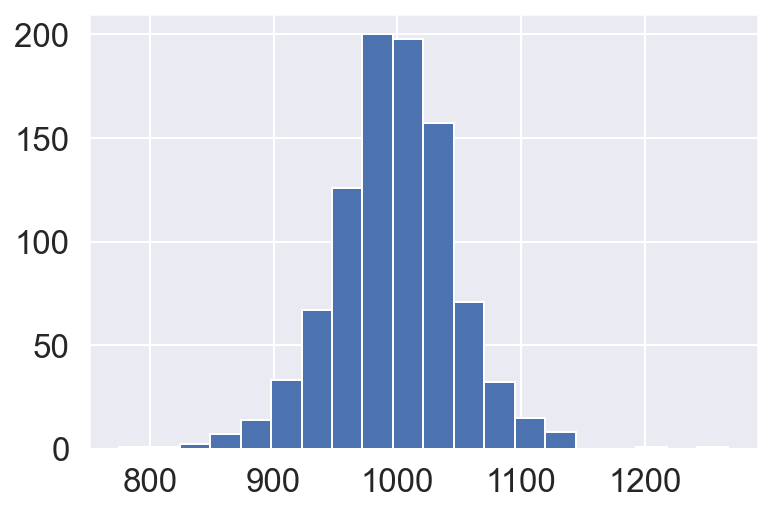

In [75]:
lengths = []
for chapter in chapters['chunks']:
    for chunk in chapter:
        lengths.append(len(chunk))
plt.hist(lengths, bins=20);

In [76]:
len(lengths)

934

In [78]:
chapters['translator'] = 'Philip Gabriel'

In [79]:
chapters['book_title'] = 'Kafka On The Shore'

In [80]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks,book_title,translator
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",[Cash isn't the only thing I take from my fath...,Kafka On The Shore,Philip Gabriel
2,2,Chapter 2,"The following document, classified Top Secret ...","[54, 56, 154, 222, 224, 252, 342, 375, 535, 57...","[878, 1901, 2996, 3947, 4936, 5847, 6928, 7936...","[The following document, classified Top Secret...",Kafka On The Shore,Philip Gabriel
3,3,Chapter 3,It's nearly dawn when I wake up. I draw the cu...,"[31, 72, 149, 230, 283, 312, 422, 553, 644, 68...","[982, 1949, 2758, 3877, 4974, 5952, 6982, 7986...",[It's nearly dawn when I wake up. I draw the c...,Kafka On The Shore,Philip Gabriel
4,4,Chapter 4,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...,"[1, 3, 322, 422, 461, 576, 664, 754, 784, 786,...","[989, 1967, 2950, 3983, 4907, 5960, 6955, 7944...",[U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \...,Kafka On The Shore,Philip Gabriel
5,5,Chapter 5,I'm asleep when our bus drives across the huge...,"[77, 162, 217, 253, 329, 421, 465, 559, 582, 5...","[979, 1980, 2983, 3987, 4922, 5957, 6952, 7958...",[I'm asleep when our bus drives across the hug...,Kafka On The Shore,Philip Gabriel


In [82]:
out_path = '../../../../Documents/murakami/pkl2/'
out_name = 'kots_gabriel_v01'
out_full_path = out_path + out_name + '.pkl'

In [83]:
# save pickle
with open(out_full_path, 'wb') as fp:
    pickle.dump(chapters, fp)


# read back pickle
with open (out_full_path, 'rb') as fp:
    read_kots = pickle.load(fp)

In [84]:
read_kots

,number,title,text,fstop_indices,split_indices,chunks,book_title,translator
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",[Cash isn't the only thing I take from my fath...,Kafka On The Shore,Philip Gabriel
2,2,Chapter 2,"The following document, classified Top Secret ...","[54, 56, 154, 222, 224, 252, 342, 375, 535, 57...","[878, 1901, 2996, 3947, 4936, 5847, 6928, 7936...","[The following document, classified Top Secret...",Kafka On The Shore,Philip Gabriel
3,3,Chapter 3,It's nearly dawn when I wake up. I draw the cu...,"[31, 72, 149, 230, 283, 312, 422, 553, 644, 68...","[982, 1949, 2758, 3877, 4974, 5952, 6982, 7986...",[It's nearly dawn when I wake up. I draw the c...,Kafka On The Shore,Philip Gabriel
4,4,Chapter 4,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...,"[1, 3, 322, 422, 461, 576, 664, 754, 784, 786,...","[989, 1967, 2950, 3983, 4907, 5960, 6955, 7944...",[U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \...,Kafka On The Shore,Philip Gabriel
5,5,Chapter 5,I'm asleep when our bus drives across the huge...,"[77, 162, 217, 253, 329, 421, 465, 559, 582, 5...","[979, 1980, 2983, 3987, 4922, 5957, 6952, 7958...",[I'm asleep when our bus drives across the hug...,Kafka On The Shore,Philip Gabriel
6,6,Chapter 6,"Hello there,"" the old man called out. \n The l...","[36, 147, 193, 216, 243, 249, 250, 251, 271, 3...","[971, 1951, 2976, 3923, 4927, 5921, 6963, 7948...","[Hello there,"" the old man called out. \n The ...",Kafka On The Shore,Philip Gabriel
7,7,Chapter 7,At seven-fifteen I eat breakfast in the restau...,"[98, 165, 228, 298, 320, 378, 415, 511, 582, 6...","[948, 1907, 2982, 3928, 4921, 5973, 6997, 7999...",[At seven-fifteen I eat breakfast in the resta...,Kafka On The Shore,Philip Gabriel
8,8,\n Chapter 8,U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \n...,"[1, 3, 433, 537, 579, 618, 757, 869, 977, 1064...","[977, 1856, 2913, 3948, 4993, 5975, 6993, 7943...",[U.S. ARMY INTELLIGENCE SECTION (MIS) REPORT \...,Kafka On The Shore,Philip Gabriel
9,9,Chapter 9,"When I come to I'm in thick brush, lying there...","[79, 114, 247, 298, 357, 422, 493, 568, 615, 7...","[937, 1998, 2979, 3968, 4967, 5955, 6955, 7960...","[When I come to I'm in thick brush, lying ther...",Kafka On The Shore,Philip Gabriel
10,10,Chapter 10,"Is it all right, then, if Nakata calls you Kaw...","[178, 302, 356, 444, 486, 532, 597, 632, 666, ...","[954, 1913, 2986, 3937, 4946, 5993, 6978, 7964...","[Is it all right, then, if Nakata calls you Ka...",Kafka On The Shore,Philip Gabriel


In [81]:
chapters.explode('chunks')

,number,title,text,fstop_indices,split_indices,chunks,book_title,translator
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",Cash isn't the only thing I take from my fathe...,Kafka On The Shore,Philip Gabriel
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",My sister's looking off to the side so half he...,Kafka On The Shore,Philip Gabriel
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",\n After giving it some thought I decide to ta...,Kafka On The Shore,Philip Gabriel
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...","Then I can leave the coat and gloves behind, a...",Kafka On The Shore,Philip Gabriel
1,1,Chapter 1,Cash isn't the only thing I take from my fathe...,"[73, 186, 247, 304, 368, 418, 490, 564, 675, 7...","[898, 1995, 2985, 3931, 4933, 5923, 6938, 7978...",I started practicing judo in the first couple ...,Kafka On The Shore,Philip Gabriel
...,...,...,...,...,...,...,...,...
49,49,Chapter 49,"Just after nine the next morning, I hear the s...","[86, 189, 252, 299, 349, 391, 559, 609, 682, 7...","[999, 1978, 2941, 3887, 4973, 5957, 6999, 7953...","\n ""Would you come with me?"" \n ""Of course."" ...",Kafka On The Shore,Philip Gabriel
49,49,Chapter 49,"Just after nine the next morning, I hear the s...","[86, 189, 252, 299, 349, 391, 559, 609, 682, 7...","[999, 1978, 2941, 3887, 4973, 5957, 6999, 7953...","""The world is a metaphor, Kafka Tamura,"" he sa...",Kafka On The Shore,Philip Gabriel
49,49,Chapter 49,"Just after nine the next morning, I hear the s...","[86, 189, 252, 299, 349, 391, 559, 609, 682, 7...","[999, 1978, 2941, 3887, 4973, 5957, 6999, 7953...",She's in the middle of work but says she can s...,Kafka On The Shore,Philip Gabriel
49,49,Chapter 49,"Just after nine the next morning, I hear the s...","[86, 189, 252, 299, 349, 391, 559, 609, 682, 7...","[999, 1978, 2941, 3887, 4973, 5957, 6999, 7953...","There was somebody else in the house, looking ...",Kafka On The Shore,Philip Gabriel
